<a href="https://colab.research.google.com/github/galloeileen/Final_Project_2021_Python/blob/main/FinalProject_2021_Eileen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

README.md

**LAPD calls for service** 

Thinking about relocating and/or purchasing a home? If you were planning to move into a different city then it would be very perceptive to look at data when making a big relocation decision, as it may affect your everyday life. Luckily, the LAPD publishes the calls they service throughout Los Angeles County. This data frame below allows anyone to find out what areas in Los Angeles County have a higher call volume since it is a very big city.

In [1]:
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import sucessful')

Import sucessful


In [2]:
#Load csv data
lapd_calls = pd.read_csv('https://raw.githubusercontent.com/galloeileen/Final_Project_2021_Python/main/LAPD_Calls_for_Service_2020.csv')



print('data loaded successfully')

data loaded successfully


In [3]:
#Make a copy of the csv - OPTIONAL
crime_data = lapd_calls.copy()

In [4]:
#Drop unnecessary columns
crime_data.drop(columns=['Rpt_Dist', 'Incident_Number', 'Dispatch_Time'], inplace=True)

#Confirm dropped columns
crime_data.head()


,Area_Occ,Dispatch_Date,Call_Type_Code,Call_Type_Text
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [5]:
#Rename colums
crime_data.rename(columns={'Area_Occ': 'Los Angeles Area', 'Call_Type_Code': 'Call-type', 'Call_Type_Text': 'Call-Code Description', 'Dispatch_Date': 'Date of Incident'}, inplace=True)
crime_data.head()

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [6]:
#Delete all of the CODE 6 from CSV
code_description = crime_data[~crime_data['Call-Code Description'].str.contains('CODE 6')]

code_description

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP
6,West LA,3/28/2020 0:00,507A,AUTO REPAIR
8,Outside,3/26/2020 0:00,902,TRAFFIC STOP
9,Wilshire,3/28/2020 0:00,415G,GRP
...,...,...,...,...
989,Olympic,3/23/2020 0:00,902,TRAFFIC STOP
990,Harbor,3/22/2020 0:00,415F,FIGHT
991,Topanga,3/28/2020 0:00,9282,ADULT
993,Van Nuys,3/22/2020 0:00,507P,PARTY


In [7]:
#Delete Los Angeles Area that categorizes as "Outside" 
code_description = crime_data[~crime_data['Los Angeles Area'].str.contains('Outside')]
code_description

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP
6,West LA,3/28/2020 0:00,507A,AUTO REPAIR
9,Wilshire,3/28/2020 0:00,415G,GRP
...,...,...,...,...
990,Harbor,3/22/2020 0:00,415F,FIGHT
991,Topanga,3/28/2020 0:00,9282,ADULT
993,Van Nuys,3/22/2020 0:00,507P,PARTY
995,Foothill,3/25/2020 0:00,6,CODE 6


In [8]:
# Group columns by Los Angeles Area + size
code_description.groupby(by=['Los Angeles Area', 'Call-Code Description']).size()
                                                                           
grouped_df = code_description.groupby('Los Angeles Area')
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")


    Los Angeles Area Date of Incident Call-type Call-Code Description
147      77th Street   3/26/2020 0:00         6                CODE 6
153      77th Street   3/24/2020 0:00     447SN              SUSP NOW
159      77th Street   3/28/2020 0:00      5101                   CAR
188      77th Street   3/28/2020 0:00      415M                   MAN
253      77th Street   3/25/2020 0:00         6                CODE 6
323      77th Street   3/24/2020 0:00      415M                   MAN
364      77th Street   3/24/2020 0:00     245FJ       SHOTS FIRED J/O
401      77th Street   3/25/2020 0:00      415W                 WOMAN
444      77th Street   3/26/2020 0:00      507R                 RADIO
450      77th Street   3/21/2020 0:00     4591I            BFV INVEST
469      77th Street   3/24/2020 0:00         6                CODE 6
480      77th Street   3/27/2020 0:00      245S                  SUSP
489      77th Street   3/28/2020 0:00      620F                FAMILY
519      77th Street

Text(0, 0.5, 'Number of Calls')

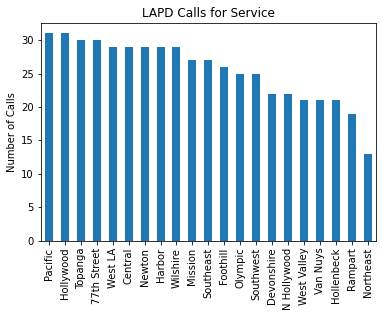

In [9]:
#Create Bar chart - Los Angeles Area call volume 

code_description['Los Angeles Area' ].value_counts().plot(kind='bar')

# Added a title to my bar chart
plt.title('LAPD Calls for Service')

# Added a label 
plt.ylabel('Number of Calls')

In [10]:
#Top 3 cities in this dataset
code_service = code_description['Los Angeles Area'].value_counts()
top_cities = code_service.head(3).index.value_counts()
top_cities



Topanga      1
Pacific      1
Hollywood    1
dtype: int64

In [11]:
#Top 3 cities in this dataset
top_cities.index.values

array(['Topanga', 'Pacific', 'Hollywood'], dtype=object)

In [12]:
#Group cities that have call-type as 415
code_codes = code_description[code_description['Call-type'] == '415M']
code_codes.groupby('Los Angeles Area').size()

Los Angeles Area
77th Street    2
Central        4
Devonshire     1
Foothill       1
Harbor         3
Hollenbeck     1
Hollywood      1
Mission        1
Newton         4
Olympic        4
Pacific        5
Southeast      2
Southwest      3
Topanga        5
Van Nuys       1
West LA        5
West Valley    2
Wilshire       5
dtype: int64

Text(0, 0.5, 'Call type is 415')

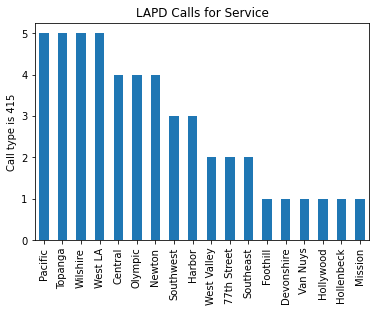

In [13]:
#Create Bar chart - Los Angeles Area call type

code_codes['Los Angeles Area' ].value_counts().plot(kind='bar')

# Added a title to my bar chart
plt.title('LAPD Calls for Service')

# Added a label to find out all of the 415 calls for service which are related to disturbances 
plt.ylabel('Call type is 415')